In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import datetime as dt


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import preprocessing

Подгружаем наши данные 

In [2]:
df = pd.read_csv('dataframe.csv', delimiter=';')

Посмотрим первые и последние 10 строчек наших данных

In [3]:
df.head(10)

,Time,Quantity
0,27.07.2022 15:15,718.0
1,27.07.2022 15:30,665.0
2,27.07.2022 15:45,637.0
3,27.07.2022 16:00,661.0
4,27.07.2022 16:15,668.0
5,27.07.2022 16:30,687.0
6,27.07.2022 16:45,692.0
7,27.07.2022 17:00,640.0
8,27.07.2022 17:15,680.0
9,27.07.2022 17:30,678.0


In [4]:
df.tail(10)

,Time,Quantity
2871,26.08.2022 13:00,772.0
2872,26.08.2022 13:15,746.0
2873,26.08.2022 13:30,782.0
2874,26.08.2022 13:45,797.0
2875,26.08.2022 14:00,829.0
2876,26.08.2022 14:15,793.0
2877,26.08.2022 14:30,706.0
2878,26.08.2022 14:45,556.0
2879,26.08.2022 15:00,582.0
2880,26.08.2022 15:15,771.0


Выведем статистику наших данных

In [5]:
df.describe()


,Quantity
count,2718.000000
mean,368.701619
std,295.226746
min,0.000000
25%,61.000000
50%,348.000000
75%,668.000000
max,982.000000


И посмотрим на типы данных которые хранятся в таблице

In [6]:
df.dtypes

Time         object
Quantity    float64
dtype: object

Размер нашей таблицы составляет 2881 строку и 2 слолбца

In [7]:
df.shape

(2881, 2)

Проверим какое количество строчек без значения присутствует в таблице, и увидим, что 163 строчки не имеют данные

In [8]:
df.isnull().sum()

Time          0
Quantity    163
dtype: int64

Возьмем первое значение времени и рассчитаем смещение, для отбора полных 5 дней

In [9]:
df.Time[0][-5:]

'15:15'

In [10]:
startDayTime = int((24*60/15) - (15*60+15)/15)
endFiveDay = int((24*60/15*5) + startDayTime)


In [11]:
dfHead = df[startDayTime:endFiveDay].reset_index(drop=True)
dfHead

,Time,Quantity
0,28.07.2022 0:00,NaN
1,28.07.2022 0:15,NaN
2,28.07.2022 0:30,NaN
3,28.07.2022 0:45,NaN
4,28.07.2022 1:00,NaN
...,...,...
475,01.08.2022 22:45,8.0
476,01.08.2022 23:00,6.0
477,01.08.2022 23:15,8.0
478,01.08.2022 23:30,7.0


In [12]:
quantityMin = int(df.Quantity.min())
quantityMax = int(df.Quantity.max())

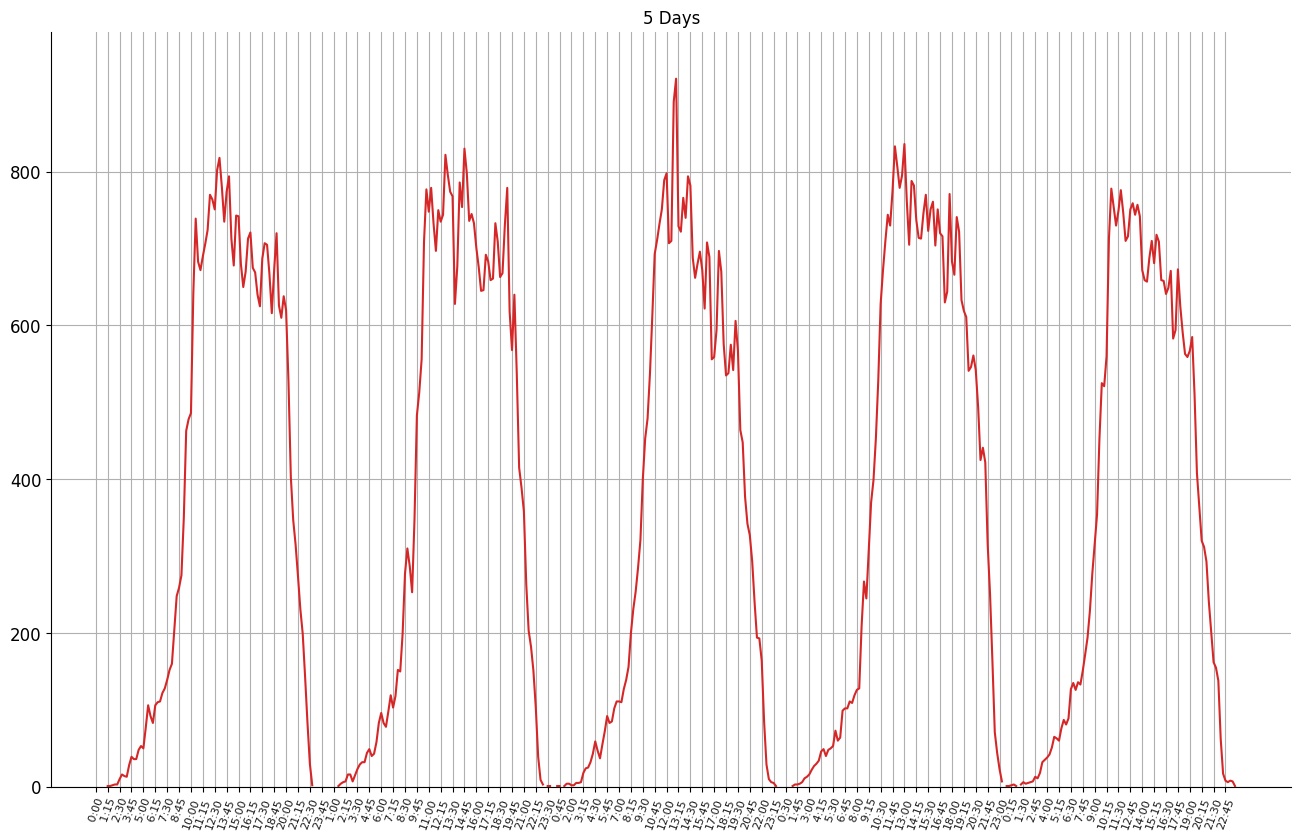

In [13]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 100)
plt.plot('Time', 'Quantity', data=dfHead, color='tab:red')

# Decoration
plt.ylim(quantityMin, quantityMax)
xtick_location = dfHead.index.tolist()[::5]
xtick_labels = [x[-5:] for x in dfHead.Time.tolist()[::5]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=70, fontsize=8, horizontalalignment='center', alpha=.9)
plt.yticks(fontsize=12, alpha=1)
plt.title("5 Days", fontsize=12)
plt.grid(axis='both', alpha=1)

# # Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(1)   
plt.show()

In [14]:
dfNan = df[df.isnull().any(1)] # Сохраним данные которые имеют пропуски

Изобразим на гисторграмме зависимости кол-ва пропусков от времени

(array([43., 16., 18., 23.,  2.,  4.,  3.,  2., 10., 42.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

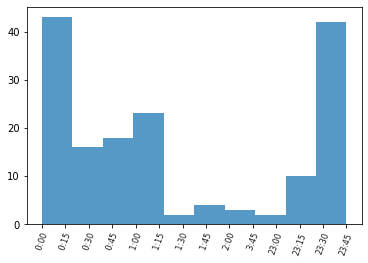

In [15]:
histNanTime =[x[-5:] for x in dfNan.Time.tolist()[::]]
histNanTime.sort()
plt.xticks(rotation=70, fontsize=8, horizontalalignment='center', alpha=.9)
plt.hist(histNanTime, alpha=0.75)

In [16]:
uniqueNanTime = np.unique(histNanTime)# Сохраним уникальные значения неизвестного времени
uniqueNanTime

array([' 0:00', ' 0:15', ' 0:30', ' 0:45', ' 1:00', ' 1:15', ' 1:30',
       ' 1:45', ' 2:00', ' 3:45', '23:00', '23:15', '23:30', '23:45'],
      dtype='<U5')


Сохраним исходный датафрейм, избавимся от даты для вычисления среднего значения пропусков

In [17]:
dfTime= df.copy()
dfTime

,Time,Quantity
0,27.07.2022 15:15,718.0
1,27.07.2022 15:30,665.0
2,27.07.2022 15:45,637.0
3,27.07.2022 16:00,661.0
4,27.07.2022 16:15,668.0
...,...,...
2876,26.08.2022 14:15,793.0
2877,26.08.2022 14:30,706.0
2878,26.08.2022 14:45,556.0
2879,26.08.2022 15:00,582.0


Уберем из датафрейма дату, для легкого получения выборки по времени

In [18]:
dfTime.Time = [x[-5:] for x in dfTime.Time]

In [19]:
dfTime

,Time,Quantity
0,15:15,718.0
1,15:30,665.0
2,15:45,637.0
3,16:00,661.0
4,16:15,668.0
...,...,...
2876,14:15,793.0
2877,14:30,706.0
2878,14:45,556.0
2879,15:00,582.0


Отберем из датафрейма значения по списку пропусков, который мы получили выше

In [20]:
NanTimeDf  = dfTime.loc[dfTime.Time.isin(uniqueNanTime)]
NanTimeDf

,Time,Quantity
31,23:00,23.0
32,23:15,NaN
33,23:30,NaN
34,23:45,NaN
35,0:00,NaN
...,...,...
2824,1:15,2.0
2825,1:30,3.0
2826,1:45,3.0
2827,2:00,6.0


Отчистим полученные данные от пропусков и сохраним только те, которые имеют значения

In [21]:
NanTimeDf = NanTimeDf.dropna(how='any')
NanTimeDf

,Time,Quantity
31,23:00,23.0
40,1:15,1.0
41,1:30,1.0
42,1:45,2.0
43,2:00,3.0
...,...,...
2824,1:15,2.0
2825,1:30,3.0
2826,1:45,3.0
2827,2:00,6.0


Составим датафрейм, который будет содержать периоды времени и средние значения для каждого из этого периода

In [22]:
uniqueNanTimeDict = {}
for i in uniqueNanTime:
    uniqueNanTimeDict[i] = int(NanTimeDf.loc[NanTimeDf.Time == i].Quantity.mean())
uniqueNanTimeDict
uniqueNanTimeDf = pd.DataFrame(list(uniqueNanTimeDict.items()),
                   columns=['Time', 'Quantity'])
uniqueNanTimeDf

,Time,Quantity
0,0:00,1
1,0:15,1
2,0:30,1
3,0:45,1
4,1:00,2
5,1:15,2
6,1:30,3
7,1:45,3
8,2:00,3
9,3:45,34


Заполним пропуски исходя из средних значений которые мы получили

In [23]:
for i, row in dfTime.iterrows():
    if np.isnan(row.Quantity):
        dfTime.Quantity[i] = uniqueNanTimeDf.Quantity.loc[uniqueNanTimeDf.Time == row.Time].values[0]

C:\Users\fourteeNseveN\AppData\Local\Temp\ipykernel_1640\2831755576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTime.Quantity[i] = uniqueNanTimeDf.Quantity.loc[uniqueNanTimeDf.Time == row.Time].values[0]


In [24]:
# dfTime.to_csv('file2.csv')
dfTime.rename({'Time': 'timeHours'}, axis=1, inplace=True)
dfTime

,timeHours,Quantity
0,15:15,718.0
1,15:30,665.0
2,15:45,637.0
3,16:00,661.0
4,16:15,668.0
...,...,...
2876,14:15,793.0
2877,14:30,706.0
2878,14:45,556.0
2879,15:00,582.0


In [25]:
extracted_col = df.Time

display(extracted_col)
  
dfTime = dfTime.join(extracted_col)

0       27.07.2022 15:15
1       27.07.2022 15:30
2       27.07.2022 15:45
3       27.07.2022 16:00
4       27.07.2022 16:15
              ...       
2876    26.08.2022 14:15
2877    26.08.2022 14:30
2878    26.08.2022 14:45
2879    26.08.2022 15:00
2880    26.08.2022 15:15
Name: Time, Length: 2881, dtype: object

Восстановим исходный датасет с датой 

In [26]:
dfTime.rename({'Time': 'timeDaysHours'}, axis=1, inplace=True)
dfTime

,timeHours,Quantity,timeDaysHours
0,15:15,718.0,27.07.2022 15:15
1,15:30,665.0,27.07.2022 15:30
2,15:45,637.0,27.07.2022 15:45
3,16:00,661.0,27.07.2022 16:00
4,16:15,668.0,27.07.2022 16:15
...,...,...,...
2876,14:15,793.0,26.08.2022 14:15
2877,14:30,706.0,26.08.2022 14:30
2878,14:45,556.0,26.08.2022 14:45
2879,15:00,582.0,26.08.2022 15:00


Разделим наши данные на обучающую, валидную и тестовые выборки

In [27]:
trainData = dfTime.iloc[:1728]# 60% данных для обучения
validData = dfTime.iloc[1728:2304]# 20% данных для валидации
testData  = dfTime.iloc[2304:2881]# 20% данных для теста

In [28]:
def timeToValue(time):
    var = time.split(':')
    var = int(var[0])*60+int(var[1])
    return var

## Переведем время в числовые значения для использования алгоритмов машинного обучения

In [29]:
trainData['valueTime'] = [timeToValue(i) for i in trainData.timeHours]

C:\Users\fourteeNseveN\AppData\Local\Temp\ipykernel_1640\1861490455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['valueTime'] = [timeToValue(i) for i in trainData.timeHours]


 ## Линейная регрессия 

In [30]:
X = pd.DataFrame(trainData.drop(['Quantity','timeHours', 'timeDaysHours' ], axis=1))
y = pd.DataFrame(trainData['Quantity'])


In [31]:
reg = LinearRegression().fit(X, y)

In [32]:
predictDate = timeToValue('23:15')
predictDate

1395

In [33]:
reg.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[555.58220356]])

С помощью линейной регрессии не удалось получить доставерные значения

## KNN

In [34]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y.values.ravel())

KNeighborsClassifier()

In [35]:
predictDate = timeToValue('23:15')
predictDate

1395

In [36]:
neigh.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3.])

In [37]:
predictDate = timeToValue('16:15')
predictDate

975

In [38]:
neigh.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([585.])

 KNN способно предсказать значения для пропущенных интервалов

## Деревья решений так же дали положительный результат

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [40]:
clf.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([676.])

In [41]:
predictDate = timeToValue('23:15')
predictDate

1395

In [42]:
clf.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.])

# Деревья решений дали более правдоподобное предсказания по сравнению с KNN, и являются рекомендованными для использования

In [43]:
predictDate = timeToValue('16:15')
predictDate

975

In [44]:
clf.predict([[predictDate]])

m:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([676.])